In [1]:
from pyrlmala.utils.plot import AveragePolicy
import numpy as np

In [2]:
policy_laplace_1    = np.load("Data/test-laplace_1-test-laplace_1_ddpg_mala_average_policy.npy")
policy_laplace_2    = np.load("Data/test-laplace_2-test-laplace_2_ddpg_mala_average_policy.npy")
policy_banana    = np.load("Data/test-banana-test-banana_ddpg_mala_average_policy.npy")

laplace_1_xr    , laplace_1_yr    = ((-3, 3, 100), (-3, 3, 100))
laplace_2_xr    , laplace_2_yr    = ((-3, 3, 100), (-3, 3, 100))
banana_xr       , banana_yr       = ((-4, 4, 100), (5, 15, 100))

items=[
        (policy_laplace_1, laplace_1_xr    , laplace_1_yr   , ""),
        (policy_laplace_2, laplace_2_xr    , laplace_2_yr   , ""),
        (policy_banana, banana_xr       , banana_yr      , ""),
    ]

/home/laurence/Code/PythonProjects/pyrlmala/src/pyrlmala/utils/plot.py:985: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


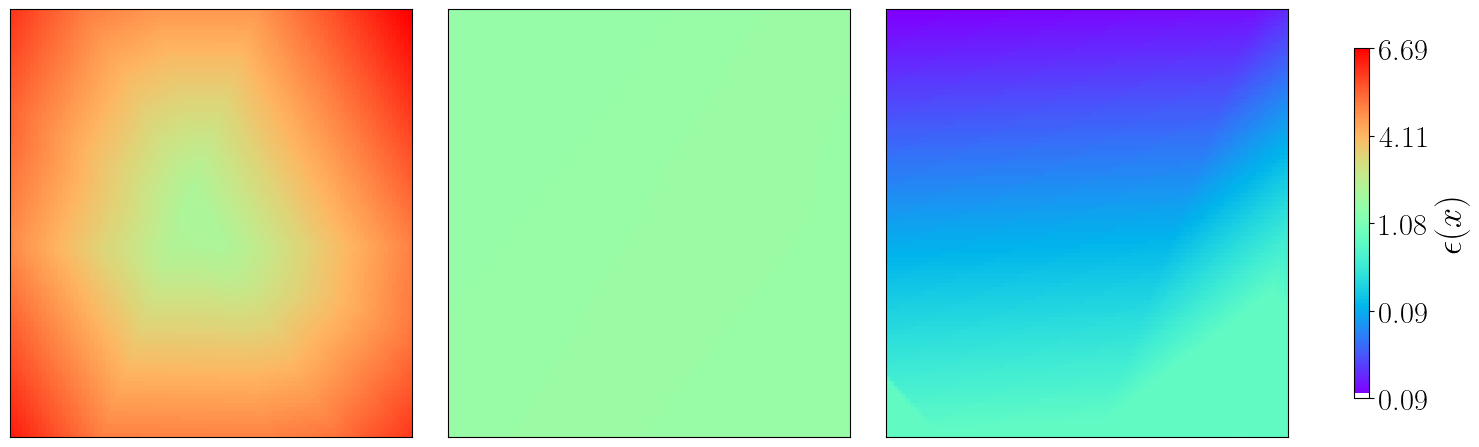

In [9]:
base_cmap = "rainbow"

all_vals = np.concatenate([Z.ravel() for Z, *_ in items])
vmin, vmax = all_vals.min(), all_vals.max()


levels = np.unique(np.concatenate([
    np.linspace(vmin, 0.095, 200),
    np.linspace(0.095, 2.1, 50),
    np.linspace(2.1, vmax, 200),
]))

AveragePolicy.plot_heatmaps_nonlinear_shared_colorbar(
    items,
    levels=levels,
    base_cmap=base_cmap,
    figsize=(15, 5),
    cbar_label=r"$\epsilon(x)$",
    save_path=f"./policy_plot_{base_cmap}.pdf"
)